In [1]:
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [53]:
#Import the basic package

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set

import warnings
warnings.filterwarnings("ignore")


In [137]:
pd.set_option('display.max_rows',800)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width',1000)

In [138]:
os.getcwd()

'C:\\Users\\RAHUL SRIVASTAVA\\Desktop\\Learnbay\\ML\\Logistic_Regression'

In [199]:
dataset = pd.read_csv("diabetes.csv")
dataset

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.1                     2.288   33        1
5              5      116             74              0        0  25.6                     0.201   30        0
6              3       78             50             32       88  31.0                     0.248   26        1
7             10      115              0              0        0  35.3                     0.134   29        0
8              2      197             70             45      543  30.5                     0.158   53        1
9              8      125             96              0        0   0.0                     0.232   54        1
10             4      110             92              0        0  37.6                     0.191   30        0
11            10      168             74              0        0  38.0                     0.537   34        1
12            10      139             80              0        0  27.1                     1.441   57        0
13             1      189             60             23      846  30.1                     0.398   59        1
14             5      166             72             19      175  25.8                     0.587   51        1
15             7      100              0              0        0  30.0                     0.484   32        1
16             0      118             84             47      230  45.8                     0.551   31        1
17             7      107             74              0        0  29.6                     0.254   31        1
18             1      103             30             38       83  43.3                     0.183   33        0
19             1      115             70             30       96  34.6                     0.529   32        1
20             3      126             88             41      235  39.3                     0.704   27        0
21             8       99             84              0        0  35.4                     0.388   50        0
22             7      196             90              0        0  39.8                     0.451   41        1
23             9      119             80             35        0  29.0                     0.263   29        1
24            11      143             94             33      146  36.6                     0.254   51        1
25            10      125             70             26      115  31.1                     0.205   41        1
26             7      147             76              0        0  39.4                     0.257   43        1
27             1       97             66             15      140  23.2                     0.487   22        0
28            13      145             82             19      110  22.2                     0.245   57        0
29             5      117             92              0        0  34.1                     0.337   38        0
30             5      109             75             26        0  36.0                     0.546   60        0
31             3      158             76             36      245  31.6                     0.851   28        1
32             3       88             58             11       54  24.8                     0.267   22        0
33             6       92             92              0        0  19.9                     0.188   28        0
34            10      122             78             31        0  27.6                     0.512   45        0
35       

#To chcek how much percentage of data is missing in my dataset for Glucose column 

or

#You can go to the excel apply the filter and you will b able to get the Glucose how many missing values there

# Advance EDA Method - "dtale" Method

In [57]:
!pip install dtale

In [58]:
import dtale
import dtale.app as dtale_app

In [61]:

df = pd.DataFrame(dataset)  # Your dataframe
dtale.show(df, host='localhost', port=5000)

In [60]:
#Dtale is better than pandas profiling

# Multivariate Analysis

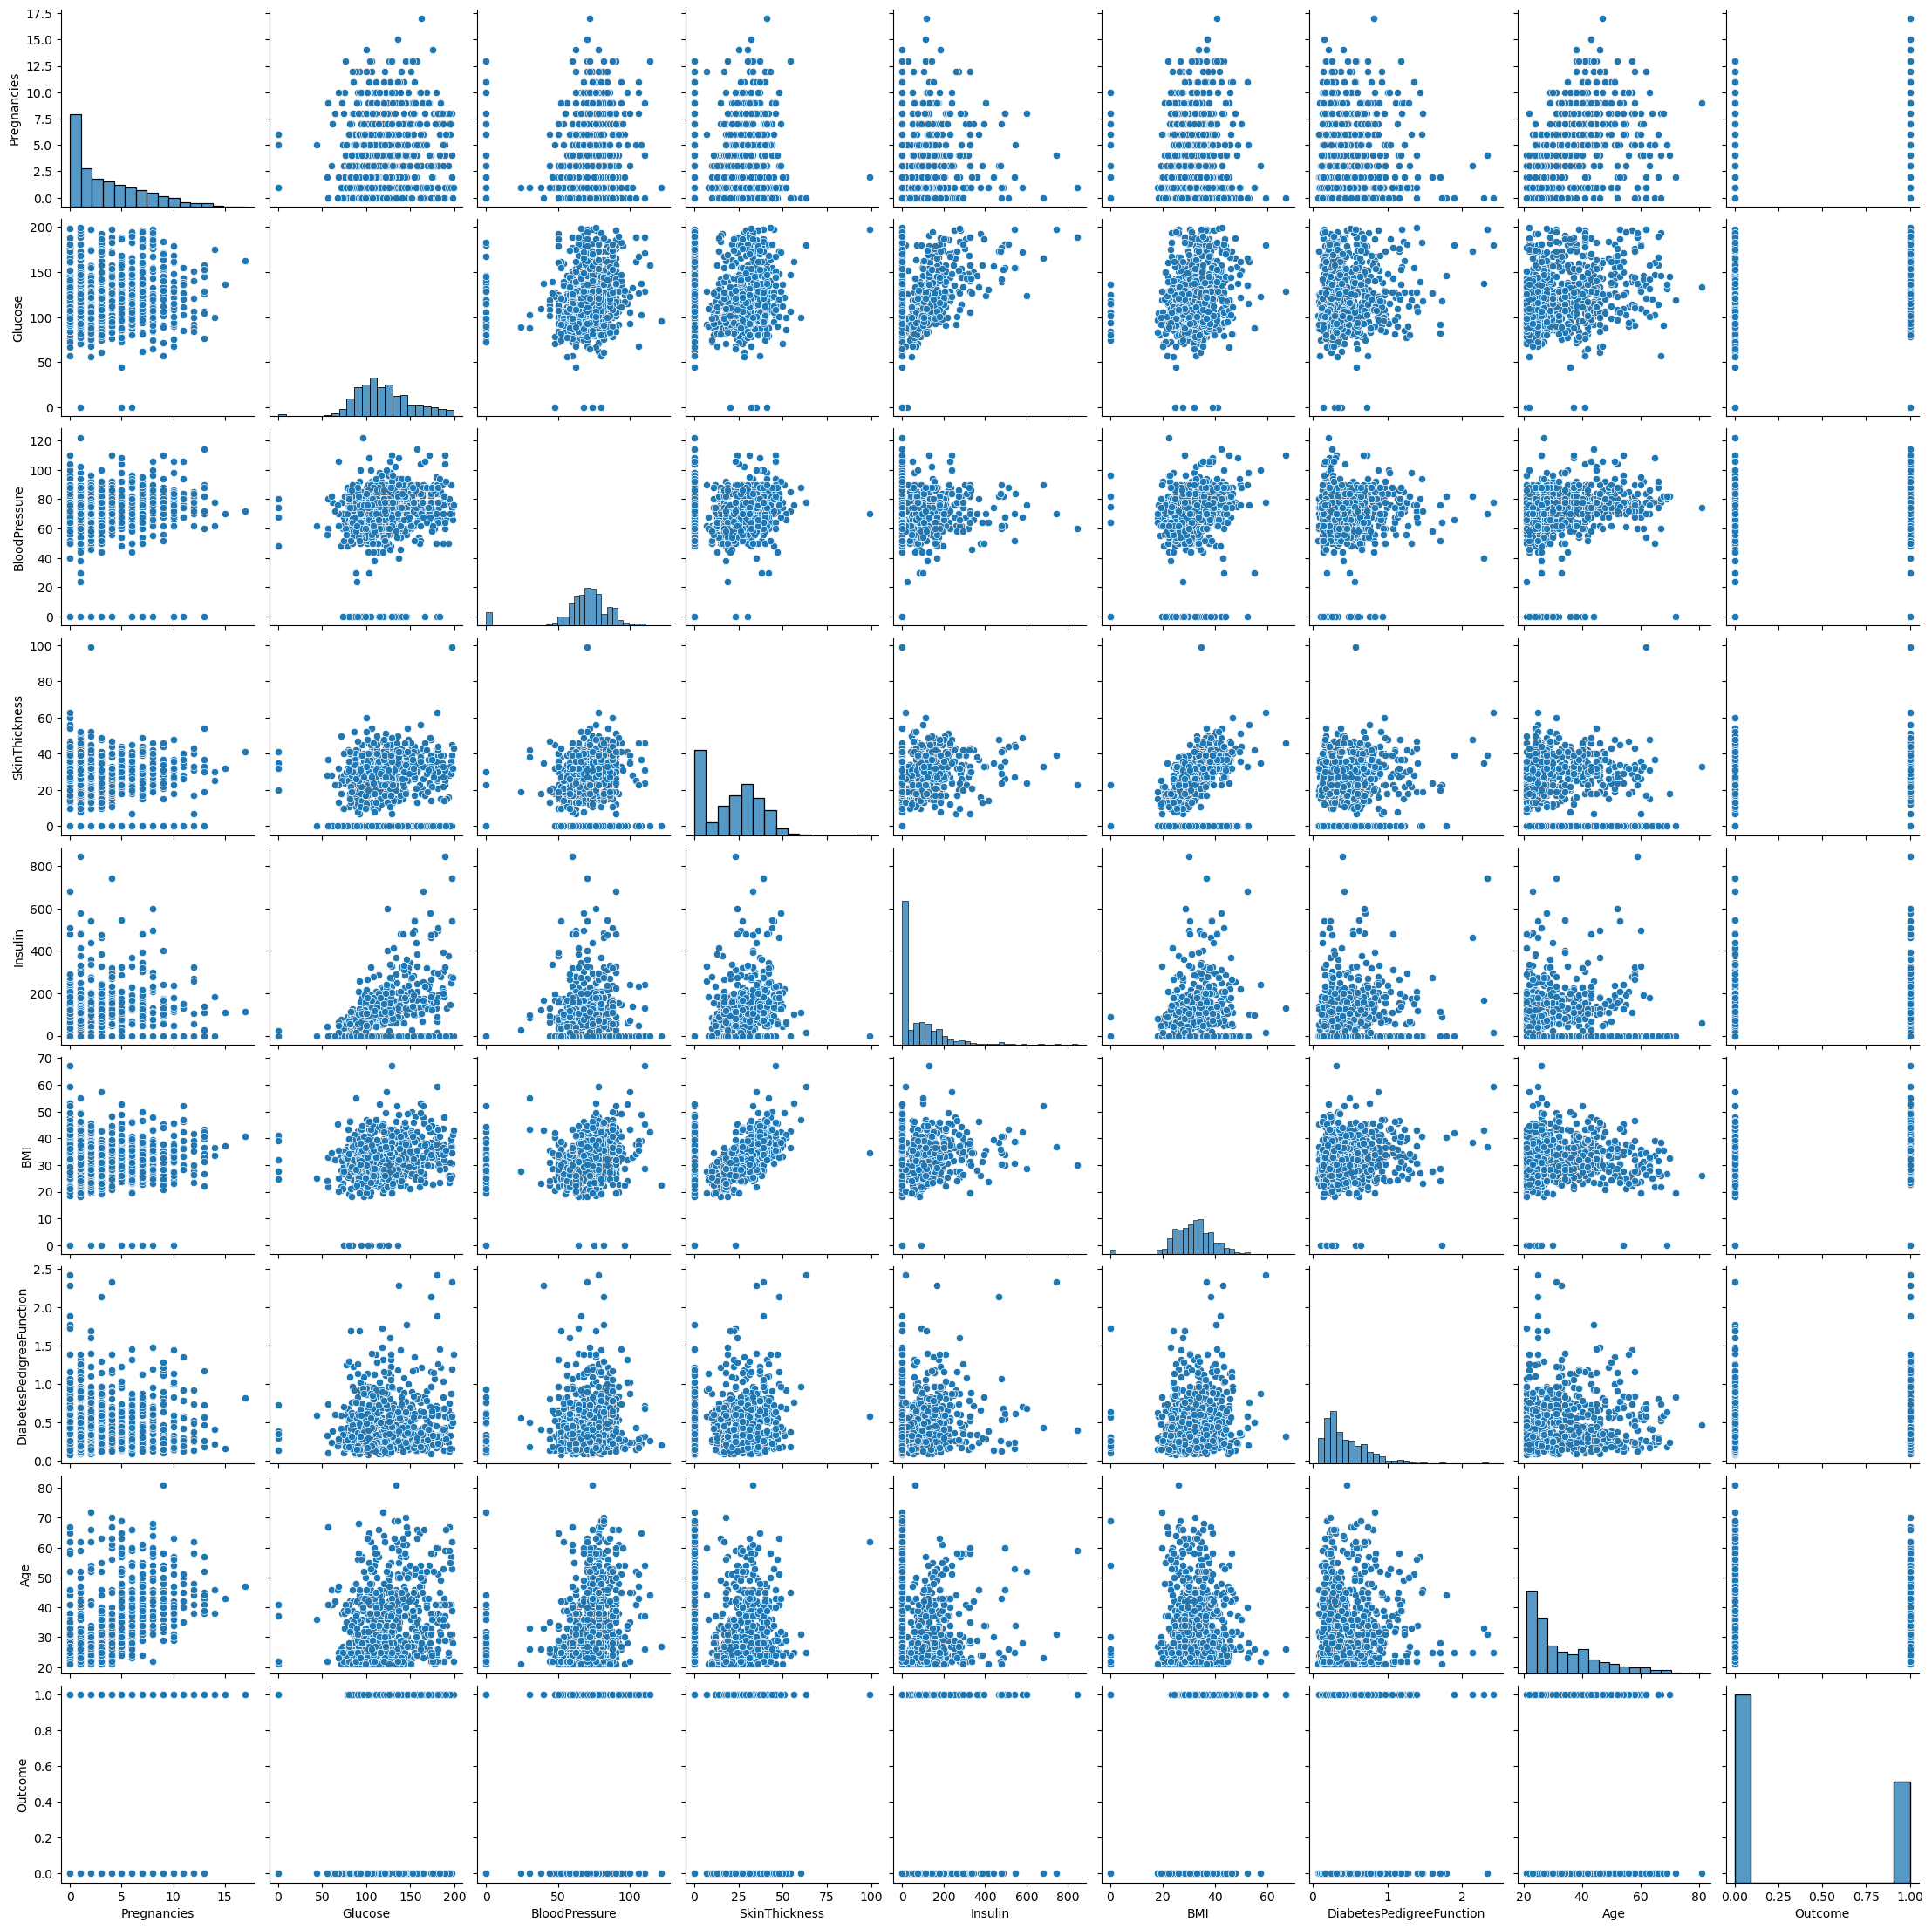

In [101]:
sns.pairplot(dataset)

In [102]:
#Go to the outcome if you do pairplot,will you able to understand what type of problem it is either classification or regression
#Pairplot is multivariate analysis

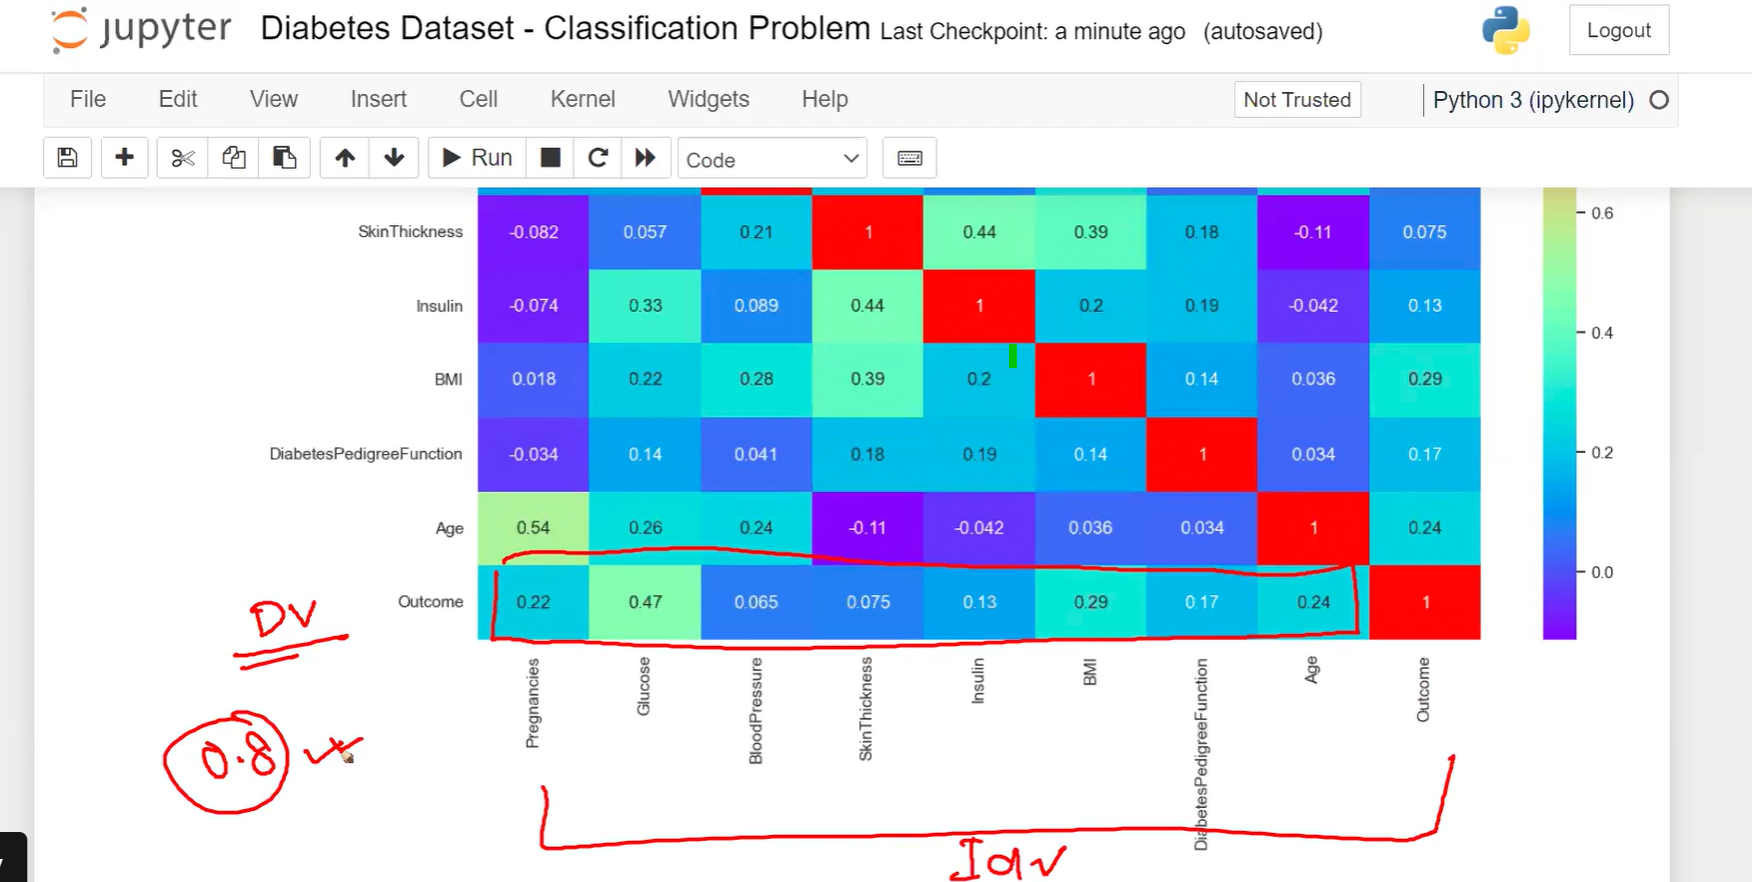

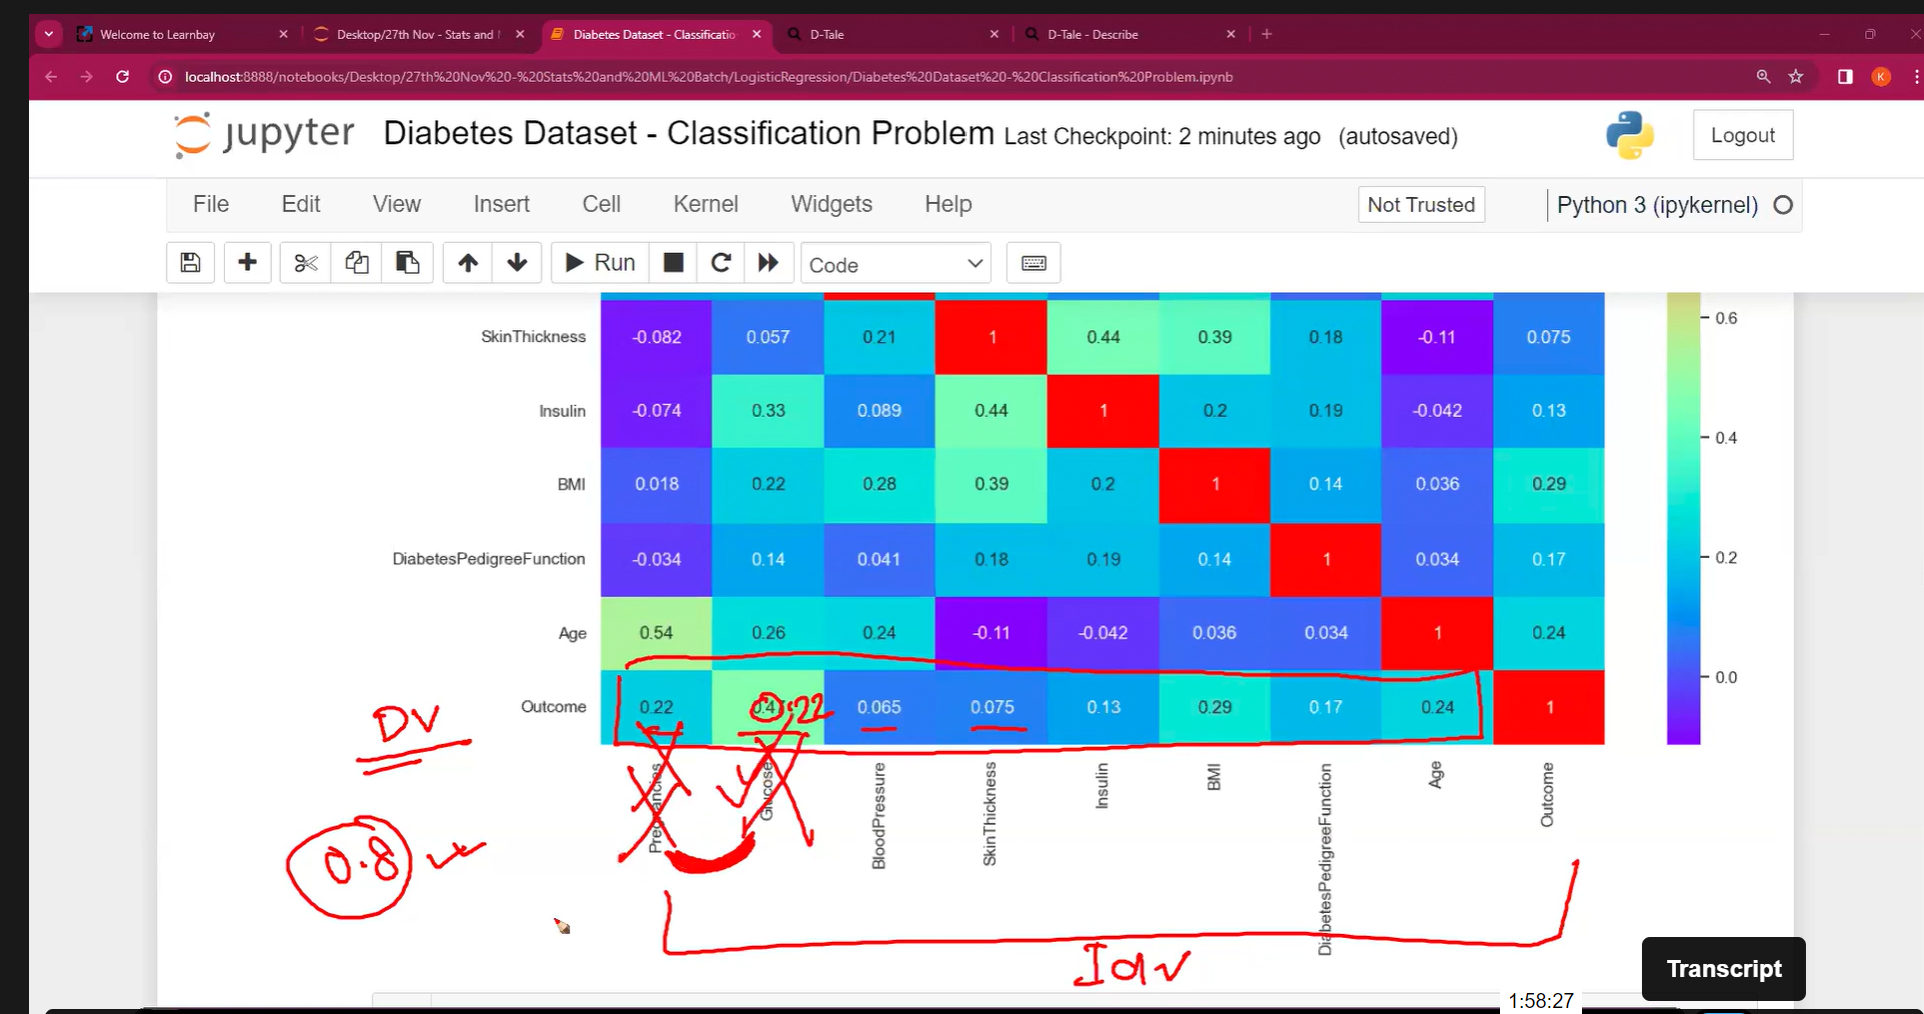

for example pregnancies and glucose has same correlation values with dependent variable so we can drop any of the columns 
so it is better to remove pregnancies column and to keep Gluscose feature

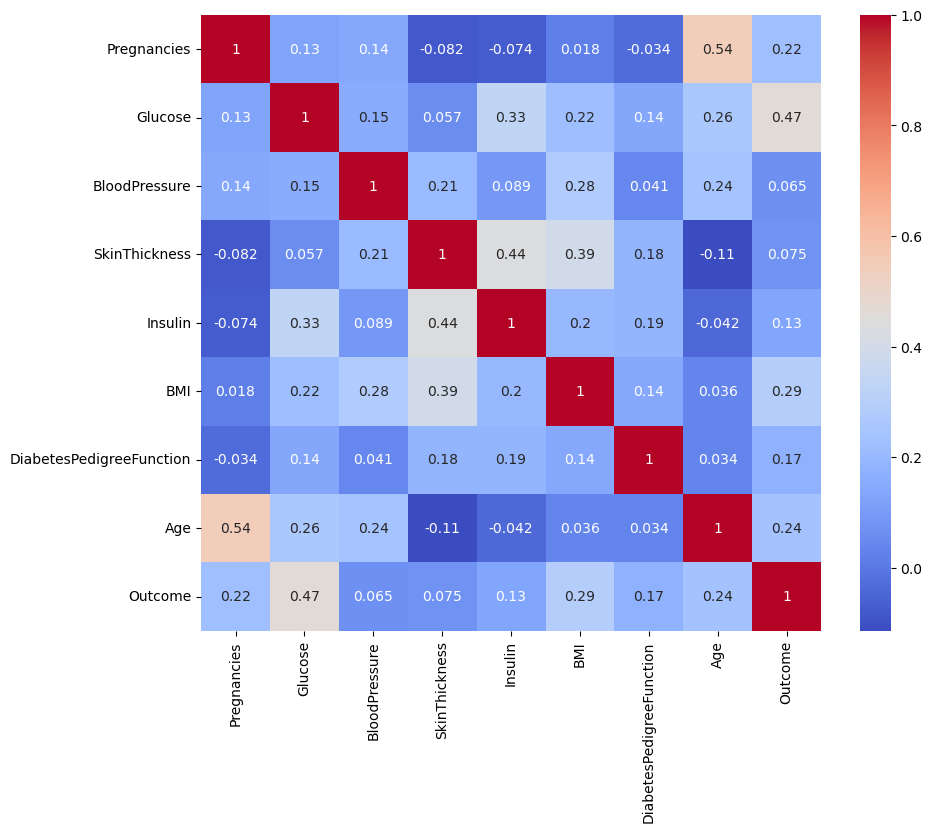

In [140]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot = True ,cmap='coolwarm')
plt.show()

In [141]:
#In heatmap if 0.8 is comung then it is problem which means that value itself is influencing a lot

In [200]:
dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age     Outcome
count   768.000000  768.000000     768.000000     768.000000  768.000000  768.000000                768.000000  768.000000  768.000000
mean      3.845052  120.894531      69.105469      20.536458   79.799479   31.992578                  0.471876   33.240885    0.348958
std       3.369578   31.972618      19.355807      15.952218  115.244002    7.884160                  0.331329   11.760232    0.476951
min       0.000000    0.000000       0.000000       0.000000    0.000000    0.000000                  0.078000   21.000000    0.000000
25%       1.000000   99.000000      62.000000       0.000000    0.000000   27.300000                  0.243750   24.000000    0.000000
50%       3.000000  117.000000      72.000000      23.000000   30.500000   32.000000                  0.372500   29.000000    0.000000
75%       6.000000  140.250000      80.000000      32.000000  127.250000   36.600000                  0.626250   41.000000    1.000000
max      17.000000  199.000000     122.000000      99.000000  846.000000   67.100000                  2.420000   81.000000    1.000000

# Missing Values

In [201]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [202]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [203]:
dataset.describe()
#describe will give you min range of data


#Note
#Insulin I can found the variance between man and median so there is outliers,I will go by median imputation 
#Rest columns I will go mean Imputation
#But I will go with median imputation
#50% i my median value

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age     Outcome
count   768.000000  768.000000     768.000000     768.000000  768.000000  768.000000                768.000000  768.000000  768.000000
mean      3.845052  120.894531      69.105469      20.536458   79.799479   31.992578                  0.471876   33.240885    0.348958
std       3.369578   31.972618      19.355807      15.952218  115.244002    7.884160                  0.331329   11.760232    0.476951
min       0.000000    0.000000       0.000000       0.000000    0.000000    0.000000                  0.078000   21.000000    0.000000
25%       1.000000   99.000000      62.000000       0.000000    0.000000   27.300000                  0.243750   24.000000    0.000000
50%       3.000000  117.000000      72.000000      23.000000   30.500000   32.000000                  0.372500   29.000000    0.000000
75%       6.000000  140.250000      80.000000      32.000000  127.250000   36.600000                  0.626250   41.000000    1.000000
max      17.000000  199.000000     122.000000      99.000000  846.000000   67.100000                  2.420000   81.000000    1.000000

In [204]:
dataset['Glucose'] = np.where(dataset['Glucose']==0,117,dataset['Glucose'])

In [205]:
dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age     Outcome
count   768.000000  768.000000     768.000000     768.000000  768.000000  768.000000                768.000000  768.000000  768.000000
mean      3.845052  121.656250      69.105469      20.536458   79.799479   31.992578                  0.471876   33.240885    0.348958
std       3.369578   30.438286      19.355807      15.952218  115.244002    7.884160                  0.331329   11.760232    0.476951
min       0.000000   44.000000       0.000000       0.000000    0.000000    0.000000                  0.078000   21.000000    0.000000
25%       1.000000   99.750000      62.000000       0.000000    0.000000   27.300000                  0.243750   24.000000    0.000000
50%       3.000000  117.000000      72.000000      23.000000   30.500000   32.000000                  0.372500   29.000000    0.000000
75%       6.000000  140.250000      80.000000      32.000000  127.250000   36.600000                  0.626250   41.000000    1.000000
max      17.000000  199.000000     122.000000      99.000000  846.000000   67.100000                  2.420000   81.000000    1.000000

In [206]:
dataset['BloodPressure'] = np.where(dataset['BloodPressure']==0,73,dataset['BloodPressure'])
dataset['SkinThickness'] = np.where(dataset['SkinThickness']==0,23,dataset['SkinThickness'])
dataset['Insulin'] = np.where(dataset['Insulin']==0,30,dataset['Insulin'])
dataset['BMI'] = np.where(dataset['BMI']==0,32,dataset['BMI'])

# Encoding

No Encoding required

# Outliers

Don't take care of Outliers in Logistic Regression

# Feature Scaling 

It is Sigmoid curve hardly matter for us

or 
                                 
If feature scaling is required I will do at the end not in the beginning



# Imbalance Data

Check the data is imbabalnce or not

In [207]:
#sigmoid = 1/(1+e^-y)
def sigmoid(z):
    return (1/(1+np.exp(-z)))
            
    

In [208]:
sigmoid(5)

0.9933071490757153

In [209]:
sigmoid(-500)

7.124576406741285e-218

# Imbalance 

 minority*2 <= majority

In [210]:
dataset['Outcome'].value_counts()/len(dataset)*100

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

# Trick 

#when you do stratify model will ensure that both 0 and 1 data will come in train also and test also

In [211]:
# Split the data into ind variable and dep variable
x = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

In [212]:
x.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age
0            6      148             72             35       30  33.6                     0.627   50
1            1       85             66             29       30  26.6                     0.351   31
2            8      183             64             23       30  23.3                     0.672   32
3            1       89             66             23       94  28.1                     0.167   21
4            0      137             40             35      168  43.1                     2.288   33

In [213]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Imabalance Treatment

In [260]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_sam,y_sam = ros.fit_resample(x,y)
print( "Original Data :",y.value_counts())
print("After oversampling data :",y_sam.value_counts())


Original Data : Outcome
0    500
1    268
Name: count, dtype: int64
After oversampling data : Outcome
1    500
0    500
Name: count, dtype: int64


In [265]:
# Split the data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sam,y_sam,test_size=.25,
                                               random_state=101,
                                               stratify=y_sam)

#stratify means it will ensure to split the data for both (0 and 1)into train and test dataset

In [266]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# # Make sure to fit and transform both train and test sets
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)  # Only transform test set, do not fit again

# Building Logistic Regression

In [267]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='ovr')
logit_model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

# Predict the model with train and test

In [268]:
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

# Evaluation Metrics

In [269]:
from sklearn.metrics import confusion_matrix ,classification_report ,accuracy_score

In [270]:
print(confusion_matrix(y_train,y_pred_train))
print("********************"*10)
print(confusion_matrix(y_test,y_pred_test))

[[292  83]
 [ 90 285]]
********************************************************************************************************************************************************************************************************
[[100  25]
 [ 37  88]]


In [271]:
print(classification_report(y_train,y_pred_train))
print("********************"*10)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       375
           1       0.77      0.76      0.77       375

    accuracy                           0.77       750
   macro avg       0.77      0.77      0.77       750
weighted avg       0.77      0.77      0.77       750

********************************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       125
           1       0.78      0.70      0.74       125

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.75      0.75      0.75       250



In [272]:
print(accuracy_score(y_train,y_pred_train))
print("********************"*10)
print(accuracy_score(y_test,y_pred_test))

0.7693333333333333
********************************************************************************************************************************************************************************************************
0.752


# Can I Improve my model and accuracy 

In [221]:
# Feature Scaling is pre Processing Method

In [222]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Make sure to fit and transform both train and test sets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)  # Only transform test set, do not fit again

In [223]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='ovr')
logit_model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [224]:
y_pred_train = logit_model.predict(x_train_scaled)
y_pred_test = logit_model.predict(x_test_scaled)

In [225]:
print(x_test.shape,x_test_scaled.shape)

(154, 8) (154, 8)


In [226]:
from sklearn.metrics import confusion_matrix ,classification_report ,accuracy_score

In [227]:
print(confusion_matrix(y_train,y_pred_train))
print("********************"*10)
print(confusion_matrix(y_test,y_pred_test))

[[399   1]
 [211   3]]
********************************************************************************************************************************************************************************************************
[[100   0]
 [ 53   1]]


In [228]:
print(classification_report(y_train,y_pred_train))
print("********************"*10)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       400
           1       0.75      0.01      0.03       214

    accuracy                           0.65       614
   macro avg       0.70      0.51      0.41       614
weighted avg       0.69      0.65      0.52       614

********************************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       1.00      0.02      0.04        54

    accuracy                           0.66       154
   macro avg       0.83      0.51      0.41       154
weighted avg       0.78      0.66      0.53       154



In [229]:
print(accuracy_score(y_train,y_pred_train))
print("********************"*10)
print(accuracy_score(y_test,y_pred_test))

0.6547231270358306
********************************************************************************************************************************************************************************************************
0.6558441558441559


In [230]:
#Don't do feature scaling for test values otherwise it will be data leakage problem

In [231]:
# Multicollinearity chcek is not required in Logistic Regression
#because of diabetese other problem happened or not 

In [90]:
#AUC ROC Curve
#K Fold  Method
#EDA - dtale,pandas profiling,datapred,Lux

# K- Fold

In [273]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logit_model,x_train,y_train,cv = 10)
print(accuracy)
print()
print(accuracy.mean())
print()
print(accuracy.max())

[0.76       0.68       0.72       0.73333333 0.78666667 0.78666667
 0.68       0.74666667 0.66666667 0.72      ]

0.728

0.7866666666666666


2024-09-23 13:55:54,378 - INFO     - Executing shutdown due to inactivity...
2024-09-23 13:56:06,683 - INFO     - Executing shutdown...
2024-09-23 13:56:06,687 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [ ]:
#Offcourse to Improve the model I will go by Random Forest,XG BOOST


# ROC - AUC Curve

In [275]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test,y_pred_test)
logistic_roc_auc

0.752

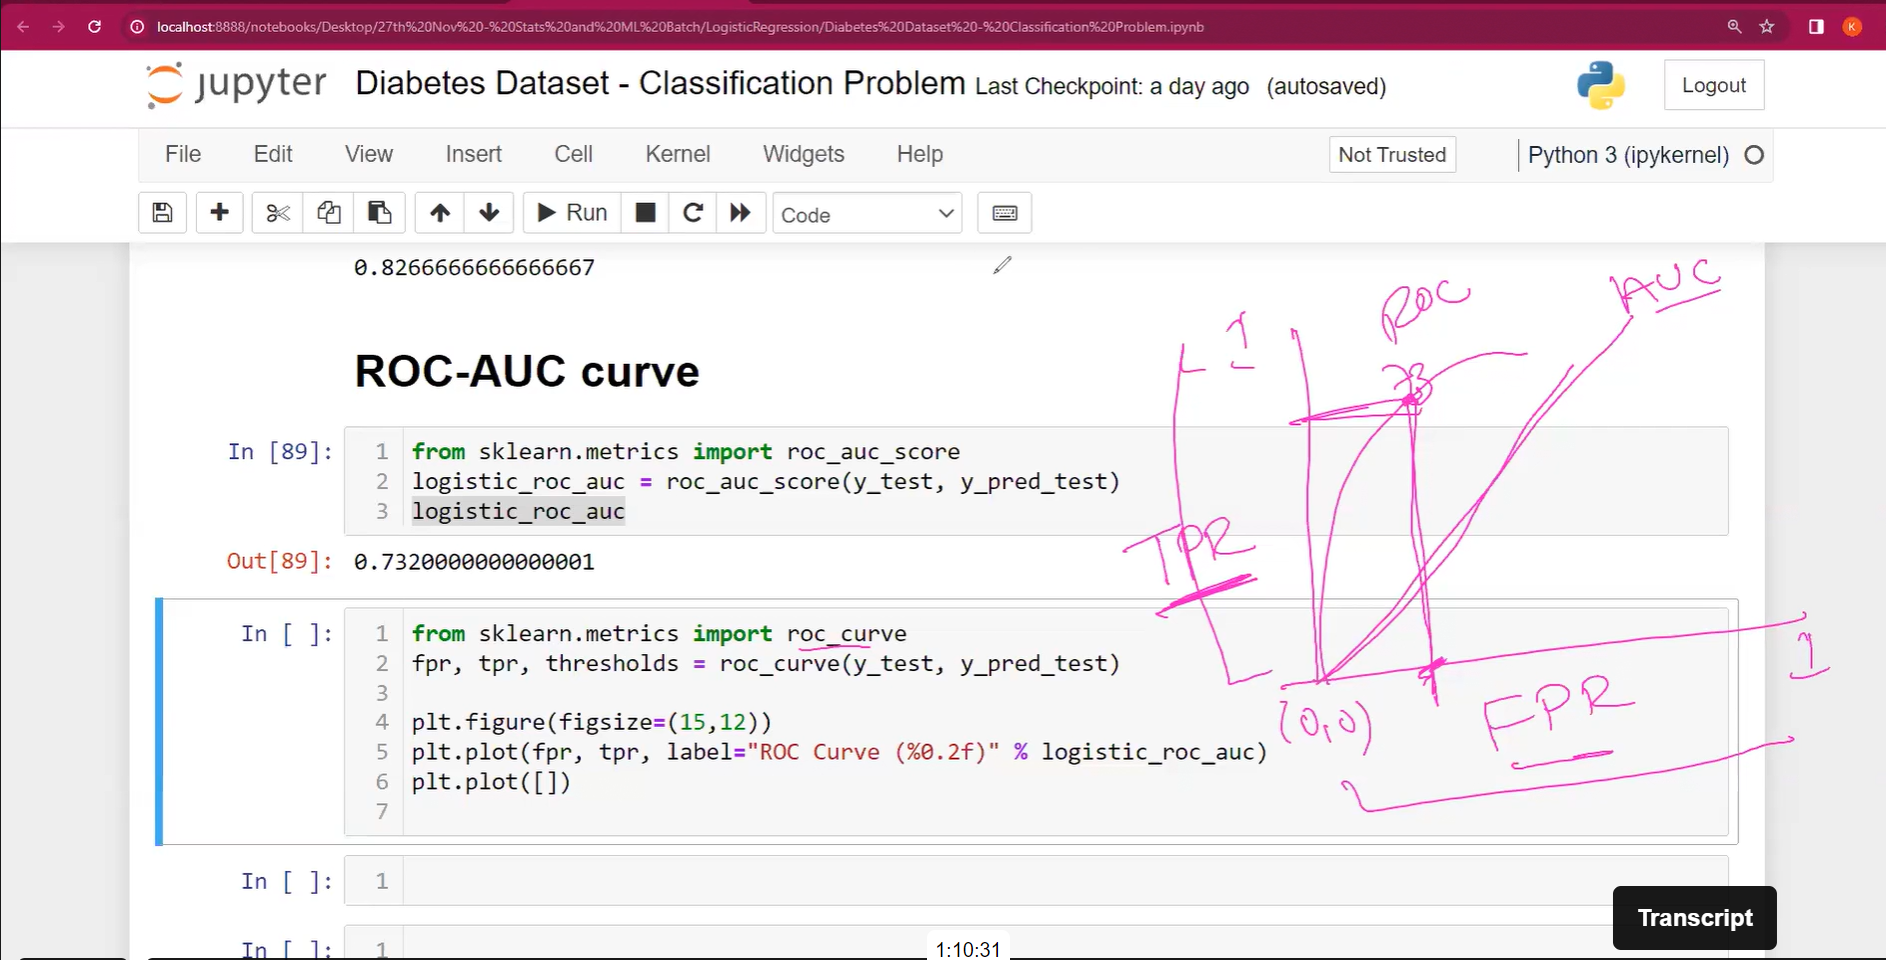

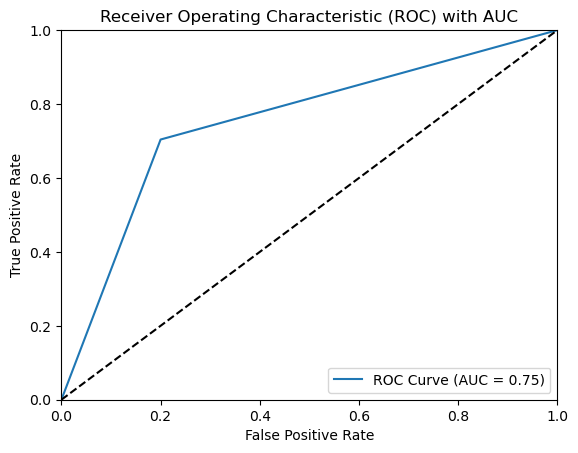

In [282]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test,y_pred_test)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (AUC = %0.2f)" % logistic_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) with AUC")
plt.legend(loc='lower right')
plt.show()

#FPR is very less and TPR is very high so this very good model